## Modulation Classification
### Dataset : Radio ML 2016.10b

In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import random, sys, keras


import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, MaxPooling1D, Reshape, ZeroPadding2D,LSTM, Conv1DTranspose
from tensorflow.keras.models import Sequential

physical_devices = tf.config.list_physical_devices("GPU")
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
# GPU Control
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5196839750997730296
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4417777331121380607
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [ ]:
cd /content/drive/MyDrive/HTVT_BTL/RadioML_2016.10b/test

/content/drive/.shortcut-targets-by-id/1cVxkm7VnqV8BdT9bYDPAoDOcdhtLDcbs/HTVT_BTL/RadioML_2016.10b/test


In [ ]:
pwd

'/content/drive/.shortcut-targets-by-id/1cVxkm7VnqV8BdT9bYDPAoDOcdhtLDcbs/HTVT_BTL/RadioML_2016.10b/test'

In [ ]:
path = "/content/drive/MyDrive/HTVT_BTL/RadioML_2016.10b/RML2016.10b.dat"

df = pd.read_pickle(path)

In [ ]:
#modülasyonların ve snr seviyelerinin arraylara atama işlemi 

key_arr = list(df.keys())            # tüm modülasyon tiplerinin tüm snr seviyeleri (220 adet) key_arr'e atandı
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], df.keys())))), [1,0])  
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(df[(mod,snr)])
        for i in range(df[(mod,snr)].shape[0]):  lbl.append(mod)
X = np.vstack(X)

X = np.transpose(X[:,:,:],(0,2,1))

In [ ]:
print(X.shape)
print("one sample :")
print(X[0])

(1200000, 128, 2)
one sample :
[[ 9.07055568e-03 -5.10897196e-04]
 [ 5.99482283e-03  7.54676433e-03]
 [-3.56530142e-03  6.11814531e-03]
 [ 4.32374468e-03  3.94818233e-03]
 [ 5.77045092e-03  5.02337753e-05]
 [ 1.11591415e-02 -3.78561992e-04]
 [-3.21659609e-04  3.57791362e-03]
 [ 3.83717869e-03 -4.11486626e-03]
 [-7.94402882e-03 -3.28155863e-03]
 [ 3.93427536e-03  6.06926344e-03]
 [ 6.42637163e-03 -1.12038217e-02]
 [ 5.75893512e-03  8.58794805e-03]
 [ 3.37828370e-03 -1.22192409e-02]
 [-6.24929788e-03  8.64007883e-03]
 [ 8.20309576e-03 -9.12125781e-03]
 [ 2.41382001e-03  1.13633031e-03]
 [ 1.62218072e-04  1.50338712e-03]
 [ 9.80655430e-04  2.70342035e-03]
 [ 4.91131423e-03  1.12705084e-03]
 [-2.34128674e-03  6.25564996e-03]
 [ 1.96919078e-03 -1.23063370e-03]
 [-1.01070721e-02 -5.86371822e-03]
 [-6.46441616e-03 -9.82510857e-03]
 [-2.59733852e-03 -5.48942946e-03]
 [-7.79386424e-03  4.00299393e-03]
 [ 5.23672847e-04  1.01149701e-04]
 [-5.33248484e-03  6.50696596e-03]
 [-3.28491116e-03  2.683

In [ ]:
with open('C:\\Users\\admin\\RadioML_2016.10b\\RML2016.10b.dat', 'rb') as f:
    u = pickle._Unpickler(f)
    u.encoding = 'latin1'
    p = u.load()

In [ ]:
#Kareem
#all keys
print("keys:")
print(p.keys())
print(p["QPSK",2].shape)
print("shape of all data:")
print(X.shape)

keys:
dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('PAM4', 18), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('8PSK', -18), ('PAM4', -6), ('WBFM', -18), ('BPSK', 8), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('AM-DSB', -18), ('QPSK', 8), ('PAM4', 14), ('WBFM', -8), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('8PSK', -10), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('WBFM', -14), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('QAM16', 8), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('WBFM', 10), ('BPSK', -20), ('PAM4', 4), ('GFSK', 10), ('QAM16', -6), ('QAM64', 4), ('PAM4', -20), ('8PSK', 10), ('QAM64', -

In [ ]:


#Kareem
#all keys
print("keys:")
print(p.keys())
#print(p["QPSK",2].shape)
print("shape of all data:")
print(X.shape)
#list of all shapes:
shapes=[]
snrs=[]
mod_types=[]
for x in p.keys():
  shapes.append(p[x].shape)
  snrs.append(x[1])
  mod_types.append(x[0])
print("same distribution of number of samples as shown:")
print(sorted(shapes)[0:20])
print(sorted(shapes)[20:40])
print(sorted(shapes)[40:60])

print("same modulation type but different SNRs:")
print(p["QPSK",-20].shape)
print(p["QPSK",-18].shape)
print(p["QPSK",-16].shape)
print(p["QPSK",-14].shape)
print(p["QPSK",-12].shape)
print(p["QPSK",-10].shape)
print(p["QPSK",-8].shape)
print(p["QPSK",-6].shape)
print(p["QPSK",-4].shape)
print(p["QPSK",-2].shape)
print(p["QPSK",0].shape)
print(p["QPSK",2].shape)
print(p["QPSK",4].shape)
print(p["QPSK",6].shape)
print(p["QPSK",8].shape)
print(p["QPSK",10].shape)
print(p["QPSK",12].shape)
print(p["QPSK",14].shape)
print(p["QPSK",16].shape)
print(p["QPSK",18].shape)



print("Again : same modulation type but different SNRs:")
print(p["CPFSK",-20].shape)
print(p["CPFSK",-18].shape)
print(p["CPFSK",-16].shape)
print(p["CPFSK",-14].shape)
print(p["CPFSK",-12].shape)
print(p["CPFSK",-10].shape)
print(p["CPFSK",-8].shape)
print(p["CPFSK",-6].shape)
print(p["CPFSK",-4].shape)
print(p["CPFSK",-2].shape)
print(p["CPFSK",0].shape)
print(p["CPFSK",2].shape)
print(p["CPFSK",4].shape)
print(p["CPFSK",6].shape)
print(p["CPFSK",8].shape)
print(p["CPFSK",10].shape)
print(p["CPFSK",12].shape)
print(p["CPFSK",14].shape)
print(p["CPFSK",16].shape)
print(p["CPFSK",18].shape)

print("same SNR for Different modulation types:")
print(p["QPSK",2].shape)
print(p["PAM4",2].shape)
print(p["AM-DSB",2].shape)
print(p["QAM64",2].shape)
#print(p["AM-SSB",2].shape)
print(p["QAM16",2].shape)
print(p["8PSK",2].shape)
print("values in keys:")
print(sorted(set(snrs)))
print(len(set(snrs)))
print(set(mod_types))
print(len(set(mod_types)))
print("all different shapes:")
print(sorted(set(shapes)))

keys:
dict_keys([('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('PAM4', 18), ('QAM64', -6), ('QAM16', 2), ('QAM16', -20), ('8PSK', -18), ('PAM4', -6), ('WBFM', -18), ('BPSK', 8), ('CPFSK', 10), ('WBFM', 6), ('BPSK', 4), ('BPSK', -2), ('QPSK', -20), ('CPFSK', -8), ('QAM64', -20), ('QAM16', 12), ('GFSK', -20), ('CPFSK', 0), ('AM-DSB', 6), ('BPSK', -16), ('QPSK', -6), ('8PSK', -12), ('CPFSK', -18), ('AM-DSB', -18), ('QPSK', 8), ('PAM4', 14), ('WBFM', -8), ('AM-DSB', -10), ('GFSK', 12), ('QAM64', 2), ('8PSK', -10), ('QAM64', -4), ('GFSK', -4), ('AM-DSB', 8), ('PAM4', -16), ('QPSK', -16), ('BPSK', 16), ('WBFM', -14), ('CPFSK', 16), ('WBFM', 0), ('QPSK', 6), ('BPSK', 14), ('AM-DSB', -8), ('GFSK', -10), ('CPFSK', -2), ('QAM16', 8), ('QAM16', 6), ('QAM16', -16), ('QAM64', 18), ('CPFSK', 6), ('BPSK', 0), ('BPSK', -6), ('8PSK', -14), ('CPFSK', -12), ('WBFM', 10), ('BPSK', -20), ('PAM4', 4), ('GFSK', 10), ('QAM16', -6), ('QAM64', 4), ('PAM4', -20), ('8PSK', 10), ('QAM64', -

In [ ]:
classes = []

# for i in range(len(key_arr)):    # Sınıflar classes list'e aktarıldı.
#     temp_key = key_arr[i][0]
#     if temp_key not in classes:
#         classes.append(temp_key)

classes = mods 
classes = np.array(classes)     #  classes list'i array'e dönüştürüldü.
classes = classes.reshape(classes.shape[0], 1)


In [ ]:
classes

array([['8PSK'],
       ['AM-DSB'],
       ['BPSK'],
       ['CPFSK'],
       ['GFSK'],
       ['PAM4'],
       ['QAM16'],
       ['QAM64'],
       ['QPSK'],
       ['WBFM']], dtype='<U6')

In [ ]:
# Atanan Verinin Train ve Test olarak split edilmesi ( %20 test verisi ayrıldı)
# Etiketleme işlemi olarak 'One Hot Encoder' kullanıldı.

X_train_val, X_test, y_train_val, y_test = train_test_split(X, lbl, test_size = 0.15, random_state = 2000)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.15, random_state = 2000)

enc = OneHotEncoder() # mã hóa các tính năng phân loại dưới dạng 1 mảng one-hot
enc.fit(classes)
print(enc.categories)

y_train_ = []
y_train_snr = []
print(enc)



#Reshape

#X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
#X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

auto
OneHotEncoder()


In [ ]:
for i in y_train:
    y_train_.append(i[0])
    y_train_snr.append(i[1])


y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
y_val = y_val.reshape(y_val.shape[0], 1)
y_train = enc.transform(y_train).toarray()
y_test = enc.transform(y_test).toarray()
y_val = enc.transform(y_val).toarray()

## CLDNN Model

In [ ]:
### CLDNN Model ###

layer_in = keras.layers.Input(shape=(128,2))
layer = keras.layers.Conv1D(filters=64, kernel_size=8, activation='relu')(layer_in)
layer = keras.layers.MaxPool1D(pool_size=2)(layer)
layer = keras.layers.LSTM(64, return_sequences=True,)(layer)
layer = keras.layers.Dropout(0.4)(layer)
layer = keras.layers.LSTM(64, return_sequences=True,)(layer)
layer = keras.layers.Dropout(0.4)(layer)
layer = keras.layers.Flatten()(layer)
layer_out = keras.layers.Dense(len(mods), activation='softmax')(layer)

model_cldnn = keras.models.Model(layer_in, layer_out)


model_cldnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 2)]          0         
                                                                 
 conv1d (Conv1D)             (None, 121, 64)           1088      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 60, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 60, 64)            33024     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                             

In [ ]:
optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.0007)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "cldnn_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.4, min_lr=0.000007),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1)]

model_cldnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_cldnn.load_weights('/content/drive/MyDrive/HTVT_BTL/RadioML_2016.10b/cldnn_model.h5')

In [ ]:
#### Optimizer Stage

###opt = keras.optimizers.adam_v2.Adam(learning_rate = 0.0007, beta_1 = 0.9, beta_2 = 0.99, amsgrad = False)

optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.0007)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "cldnn_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.4, min_lr=0.000007),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1)]

model_cldnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model_cldnn.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    callbacks = [callbacks],
                    epochs=30, batch_size = 32)



Epoch 1/30
27094/27094 [==============================] - 1152s 42ms/step - loss: 1.3940 - accuracy: 0.4329 - val_loss: 1.1129 - val_accuracy: 0.5305 - lr: 7.0000e-04
Epoch 2/30
27094/27094 [==============================] - 1158s 43ms/step - loss: 1.0771 - accuracy: 0.5473 - val_loss: 1.0368 - val_accuracy: 0.5665 - lr: 7.0000e-04
Epoch 3/30
27094/27094 [==============================] - 1133s 42ms/step - loss: 1.0234 - accuracy: 0.5773 - val_loss: 0.9777 - val_accuracy: 0.6059 - lr: 7.0000e-04
Epoch 4/30
27094/27094 [==============================] - 1129s 42ms/step - loss: 0.9784 - accuracy: 0.6050 - val_loss: 0.9557 - val_accuracy: 0.6140 - lr: 7.0000e-04
Epoch 5/30
27094/27094 [==============================] - 1102s 41ms/step - loss: 0.9561 - accuracy: 0.6152 - val_loss: 0.9452 - val_accuracy: 0.6224 - lr: 7.0000e-04
Epoch 6/30
27094/27094 [==============================] - 1110s 41ms/step - loss: 0.9444 - accuracy: 0.6207 - val_loss: 0.9331 - val_accuracy: 0.6278 - lr: 7.0000e-0

In [ ]:
history = model_cldnn.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    callbacks = [callbacks],
                    epochs=15, batch_size = 128)

Epoch 1/15
6774/6774 [==============================] - 274s 38ms/step - loss: 0.8776 - accuracy: 0.6475 - val_loss: 0.8842 - val_accuracy: 0.6466 - lr: 7.0000e-04
Epoch 2/15
6774/6774 [==============================] - 258s 38ms/step - loss: 0.8769 - accuracy: 0.6481 - val_loss: 0.8883 - val_accuracy: 0.6447 - lr: 7.0000e-04
Epoch 3/15
6774/6774 [==============================] - 258s 38ms/step - loss: 0.8756 - accuracy: 0.6489 - val_loss: 0.8846 - val_accuracy: 0.6471 - lr: 7.0000e-04
Epoch 4/15
6774/6774 [==============================] - 262s 39ms/step - loss: 0.8757 - accuracy: 0.6489 - val_loss: 0.8856 - val_accuracy: 0.6470 - lr: 7.0000e-04
Epoch 5/15
6774/6774 [==============================] - 257s 38ms/step - loss: 0.8753 - accuracy: 0.6487 - val_loss: 0.8828 - val_accuracy: 0.6467 - lr: 7.0000e-04
Epoch 6/15
6774/6774 [==============================] - 257s 38ms/step - loss: 0.8744 - accuracy: 0.6490 - val_loss: 0.8837 - val_accuracy: 0.6467 - lr: 7.0000e-04
Epoch 7/15
6774/

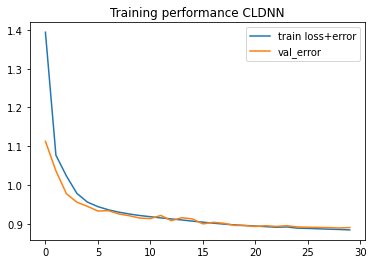

In [ ]:
### Loss graph 

plt.figure()
plt.title('Training performance CLDNN')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

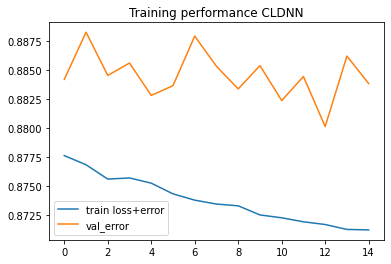

In [ ]:
### Loss graph 

plt.figure()
plt.title('Training performance CLDNN')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

In [ ]:
model = keras.models.load_model("cldnn_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy CLDNN", test_acc)
print("Test loss CLDNN", test_loss)

5625/5625 [==============================] - 64s 11ms/step - loss: 0.8892 - accuracy: 0.6441
Test accuracy CLDNN 0.6440555453300476
Test loss CLDNN 0.8892204761505127


In [ ]:
model = keras.models.load_model("cldnn_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy CLDNN", test_acc)
print("Test loss CLDNN", test_loss)

5625/5625 [==============================] - 67s 12ms/step - loss: 0.8794 - accuracy: 0.6471
Test accuracy CLDNN 0.6471166610717773
Test loss CLDNN 0.8794233798980713


In [ ]:
### Confusion matrix oluşturulması 
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

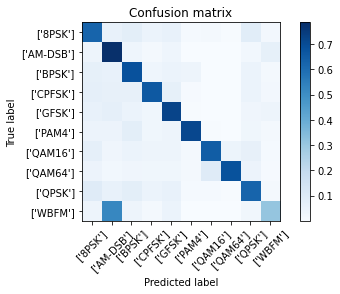

In [ ]:
### Plot confusion matrix
test_Y_hat = model_cldnn.predict(X_test, batch_size=32)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
#figure(figsize=(10, 8)
plot_confusion_matrix(confnorm, labels=classes)

In [ ]:
temp = {}
lb = {}

for i in range(20):
    temp[-20 + (i *2)] = []
    lb[-20 + (i *2)] = []
    
for i in range(20):
    for j in range(10):
        arr = df[(classes[j][0] , (-20 + (i *2)))]
        for k in range(len(arr)) : temp [-20 + (i *2 )].append(arr[k])
        for k in range(len(df[classes[j][0], -20 + ( i*2)])): lb[-20 + (i*2)].append(classes[j][0])

Overall Accuracy:  0.116
Overall Accuracy:  0.1165
Overall Accuracy:  0.1225
Overall Accuracy:  0.1385
Overall Accuracy:  0.209
Overall Accuracy:  0.318
Overall Accuracy:  0.4345
Overall Accuracy:  0.59
Overall Accuracy:  0.761
Overall Accuracy:  0.8835
Overall Accuracy:  0.9205
Overall Accuracy:  0.9295
Overall Accuracy:  0.9475
Overall Accuracy:  0.9405
Overall Accuracy:  0.9295
Overall Accuracy:  0.9345
Overall Accuracy:  0.9405
Overall Accuracy:  0.929
Overall Accuracy:  0.939
Overall Accuracy:  0.93


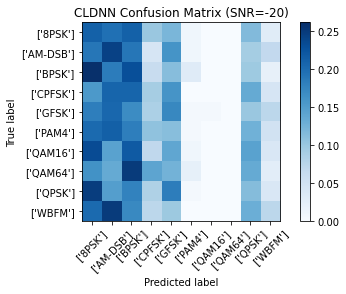

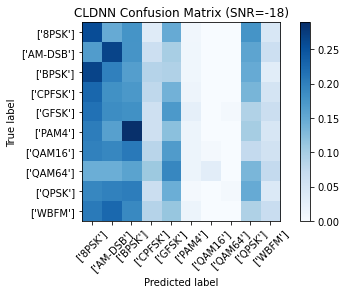

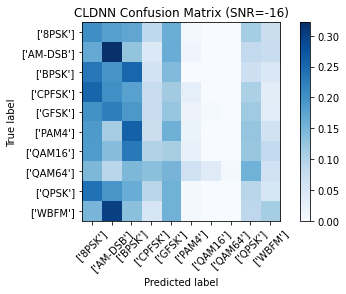

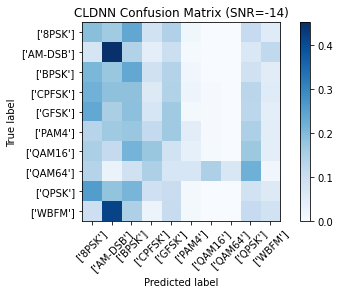

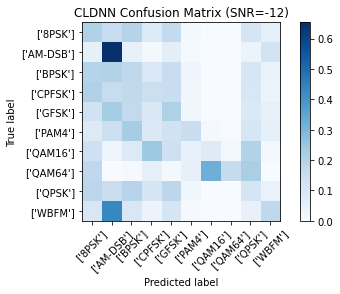

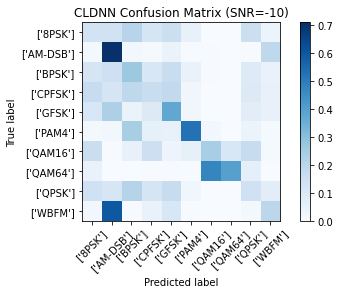

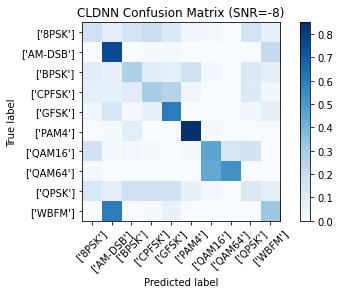

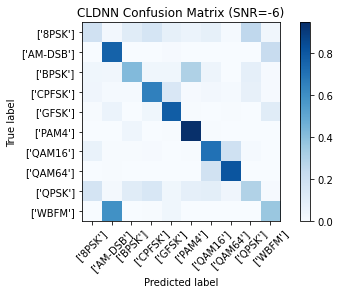

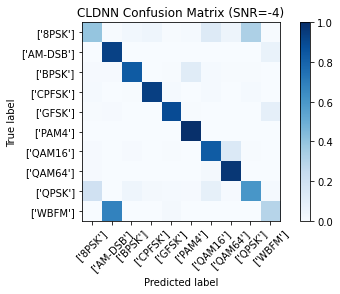

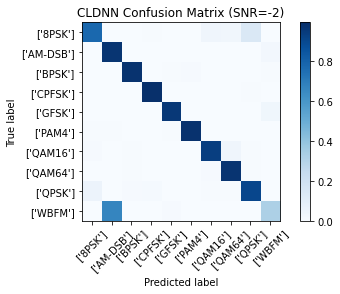

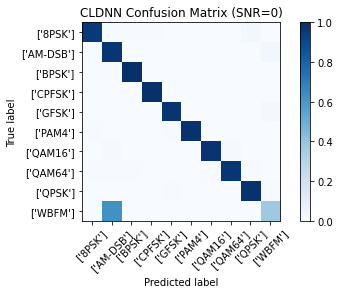

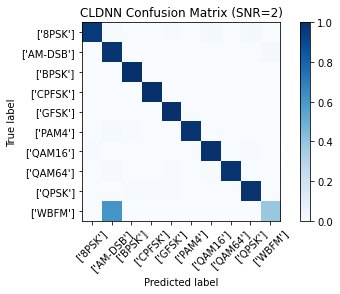

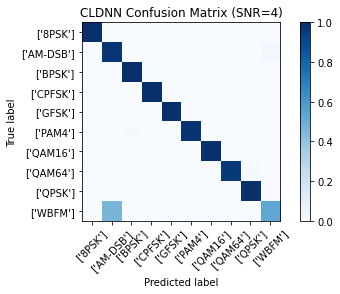

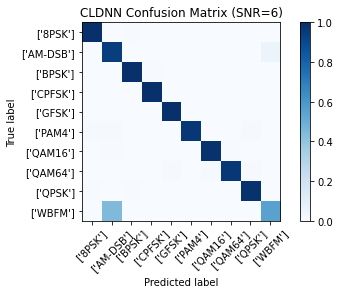

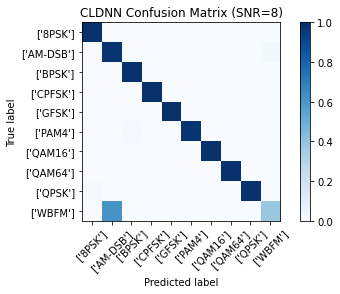

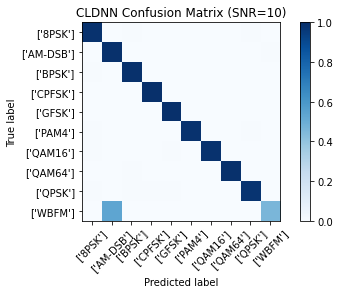

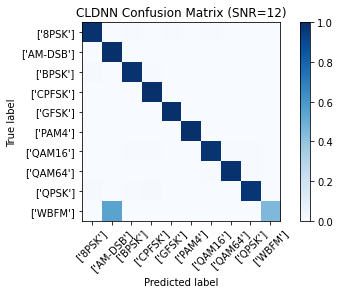

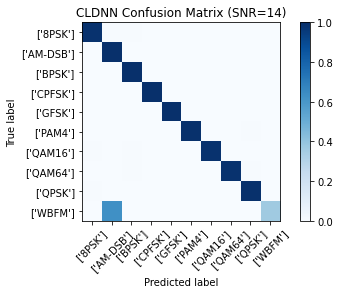

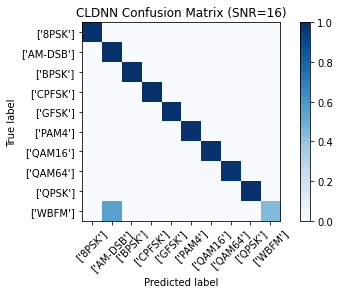

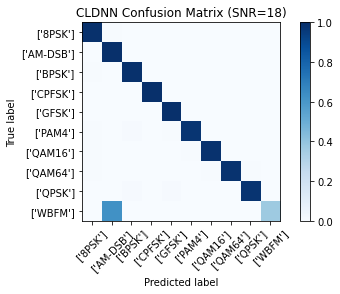

In [ ]:
acc = {}
snr = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

for snr in snrs:
    temp_np = np.array(temp[snr])
    lbl_np = np.array(lb[snr])
    
    #temp_np = temp_np.reshape(temp_np.shape[0], temp_np.shape[1], temp_np.shape[2], 1)
    lbl_np = lbl_np.reshape(lbl_np.shape[0], 1)
    
    temp_i = np.random.choice(temp_np.shape[0], 2000, replace = False)
    test_X_i = temp_np[temp_i]
    test_Y_i = lbl_np[temp_i]   
    
    test_Y_i = enc.transform(test_Y_i).toarray()

    test_X_i = np.transpose(test_X_i[:,:,:],(0,2,1))
    # estimate classes
    test_Y_i_hat = model_cldnn.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = (test_Y_i[i,:].tolist()).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="CLDNN Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

##Architectures for training
##CNN

In [ ]:
optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.0007)

cnn_in = keras.layers.Input(shape=(128,2))
cnn = keras.layers.ZeroPadding1D(padding=4)(cnn_in)
cnn = keras.layers.Conv1D(filters=50, kernel_size=8, activation='relu')(cnn)
cnn = keras.layers.MaxPool1D(pool_size=2)(cnn)
cnn = keras.layers.Conv1D(filters=50, kernel_size=8, activation='relu')(cnn)
cnn = keras.layers.MaxPool1D(pool_size=2)(cnn)
cnn = keras.layers.Conv1D(filters=50, kernel_size=4, activation='relu')(cnn)
cnn = keras.layers.Dropout(rate=0.6)(cnn)
cnn = keras.layers.MaxPool1D(pool_size=2)(cnn)
cnn = keras.layers.Flatten()(cnn)
cnn = keras.layers.Dense(70, activation='selu')(cnn)
cnn_out = keras.layers.Dense(len(mods), activation='softmax')(cnn)

model_cnn = keras.models.Model(cnn_in, cnn_out)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "cnn_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.3, patience=3, min_lr=0.00007),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=1)]

model_cnn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 2)]          0         
                                                                 
 zero_padding1d (ZeroPadding  (None, 136, 2)           0         
 1D)                                                             
                                                                 
 conv1d_1 (Conv1D)           (None, 129, 50)           850       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 64, 50)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 57, 50)            20050     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 28, 50)           0   

In [ ]:
model_cnn.load_weights('/content/drive/MyDrive/HTVT_BTL/RadioML_2016.10b/cnn_model.h5')

In [ ]:
tf.keras.backend.clear_session()
history = model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    callbacks = [callbacks],
                    epochs=3, batch_size = 128)

Epoch 1/30
27094/27094 [==============================] - 229s 8ms/step - loss: 1.2702 - accuracy: 0.4717 - val_loss: 1.1332 - val_accuracy: 0.5261 - lr: 7.0000e-04
Epoch 2/30
27094/27094 [==============================] - 233s 9ms/step - loss: 1.1272 - accuracy: 0.5269 - val_loss: 1.0942 - val_accuracy: 0.5525 - lr: 7.0000e-04
Epoch 3/30
27094/27094 [==============================] - 230s 8ms/step - loss: 1.0982 - accuracy: 0.5384 - val_loss: 1.0766 - val_accuracy: 0.5536 - lr: 7.0000e-04
Epoch 4/30
27094/27094 [==============================] - 227s 8ms/step - loss: 1.0820 - accuracy: 0.5451 - val_loss: 1.0685 - val_accuracy: 0.5564 - lr: 7.0000e-04
Epoch 5/30
27094/27094 [==============================] - 223s 8ms/step - loss: 1.0710 - accuracy: 0.5499 - val_loss: 1.0547 - val_accuracy: 0.5575 - lr: 7.0000e-04
Epoch 6/30
27094/27094 [==============================] - 223s 8ms/step - loss: 1.0629 - accuracy: 0.5532 - val_loss: 1.0524 - val_accuracy: 0.5547 - lr: 7.0000e-04
Epoch 7/30

In [ ]:
#tf.keras.backend.clear_session()
history = model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), 
                    callbacks = [callbacks],
                    epochs=15, batch_size = 128)

Epoch 1/15
6774/6774 [==============================] - 72s 10ms/step - loss: 1.0083 - accuracy: 0.5822 - val_loss: 1.0010 - val_accuracy: 0.5893 - lr: 7.0000e-04
Epoch 2/15
6774/6774 [==============================] - 70s 10ms/step - loss: 1.0077 - accuracy: 0.5824 - val_loss: 1.0107 - val_accuracy: 0.5826 - lr: 7.0000e-04
Epoch 3/15
6774/6774 [==============================] - 77s 11ms/step - loss: 1.0062 - accuracy: 0.5834 - val_loss: 1.0014 - val_accuracy: 0.5919 - lr: 7.0000e-04
Epoch 4/15
6774/6774 [==============================] - 77s 11ms/step - loss: 1.0054 - accuracy: 0.5840 - val_loss: 1.0050 - val_accuracy: 0.5901 - lr: 7.0000e-04
Epoch 5/15
6774/6774 [==============================] - 77s 11ms/step - loss: 0.9951 - accuracy: 0.5894 - val_loss: 0.9937 - val_accuracy: 0.5969 - lr: 2.1000e-04
Epoch 6/15
6774/6774 [==============================] - 77s 11ms/step - loss: 0.9939 - accuracy: 0.5907 - val_loss: 0.9950 - val_accuracy: 0.5935 - lr: 2.1000e-04
Epoch 7/15
6774/6774 [

In [ ]:
model = keras.models.load_model("cnn_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy CNN", test_acc)
print("Test loss CNN", test_loss)

5625/5625 [==============================] - 23s 4ms/step - loss: 0.9995 - accuracy: 0.5909
Test accuracy CNN 0.5909222364425659
Test loss CNN 0.9995384812355042


In [ ]:
model = keras.models.load_model("cnn_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy CNN", test_acc)
print("Test loss CNN", test_loss)

5625/5625 [==============================] - 23s 4ms/step - loss: 0.9876 - accuracy: 0.5974
Test accuracy CNN 0.5973666906356812
Test loss CNN 0.9876115322113037


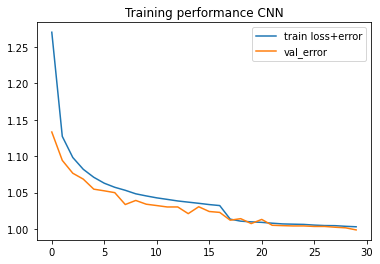

In [ ]:
### Loss graph 

plt.figure()
plt.title('Training performance CNN')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

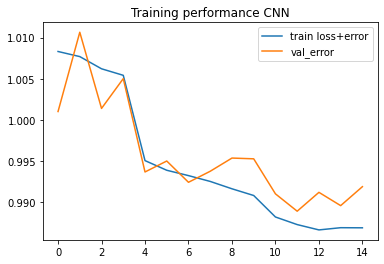

In [ ]:
### Loss graph 

plt.figure()
plt.title('Training performance CNN')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

In [ ]:
### Confusion matrix oluşturulması 
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

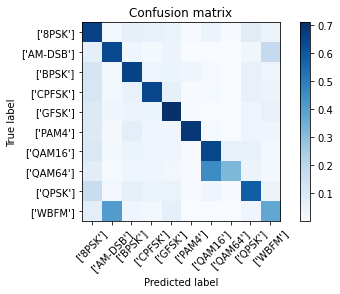

In [ ]:
### Plot confusion matrix
test_Y_hat = model_cnn.predict(X_test, batch_size=32)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
#figure(figsize=(10, 8)
plot_confusion_matrix(confnorm, labels=classes)

In [ ]:
temp = {}
lb = {}

for i in range(20):
    temp[-20 + (i *2)] = []
    lb[-20 + (i *2)] = []
    
for i in range(20):
    for j in range(10):
        arr = df[(classes[j][0] , (-20 + (i *2)))]
        for k in range(len(arr)) : temp [-20 + (i *2 )].append(arr[k])
        for k in range(len(df[classes[j][0], -20 + ( i*2)])): lb[-20 + (i*2)].append(classes[j][0])

Overall Accuracy:  0.1045
Overall Accuracy:  0.129
Overall Accuracy:  0.114
Overall Accuracy:  0.144
Overall Accuracy:  0.1755
Overall Accuracy:  0.257
Overall Accuracy:  0.3585
Overall Accuracy:  0.5165
Overall Accuracy:  0.65
Overall Accuracy:  0.769
Overall Accuracy:  0.823
Overall Accuracy:  0.865
Overall Accuracy:  0.8795
Overall Accuracy:  0.87
Overall Accuracy:  0.868
Overall Accuracy:  0.886
Overall Accuracy:  0.874
Overall Accuracy:  0.8785
Overall Accuracy:  0.8925
Overall Accuracy:  0.884


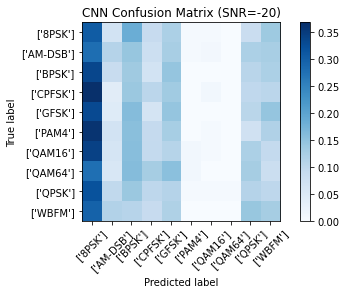

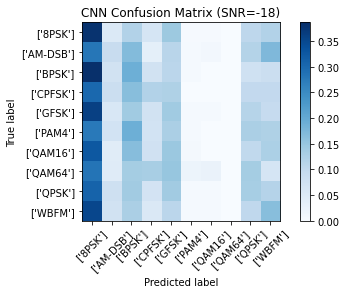

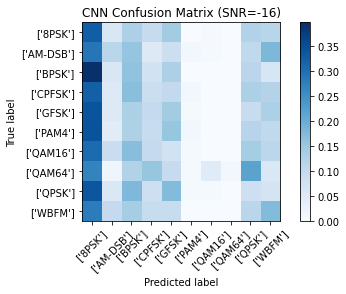

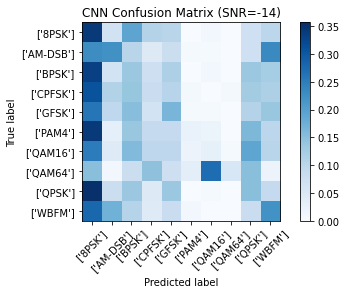

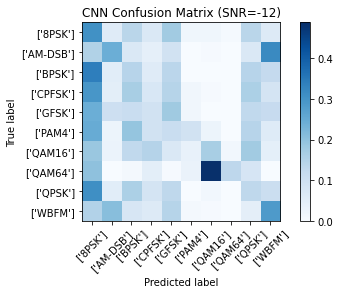

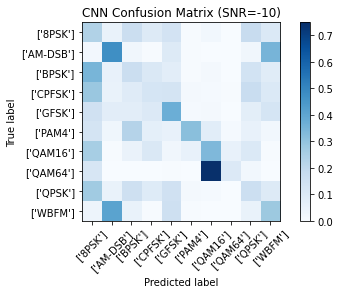

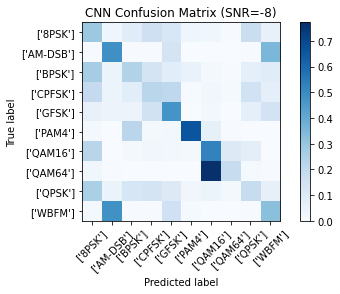

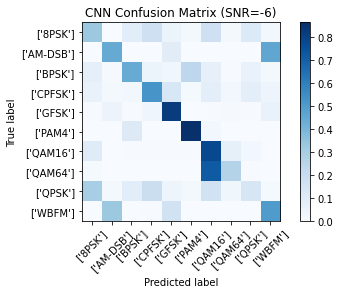

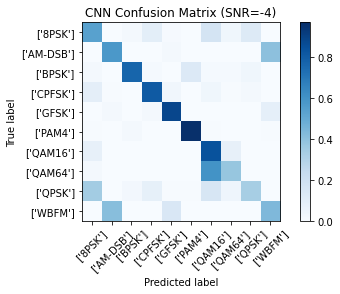

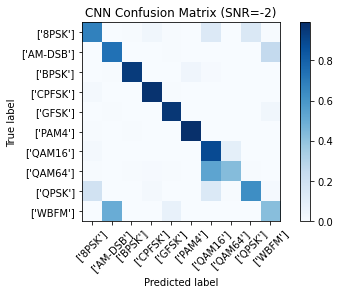

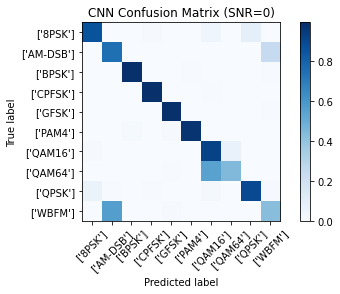

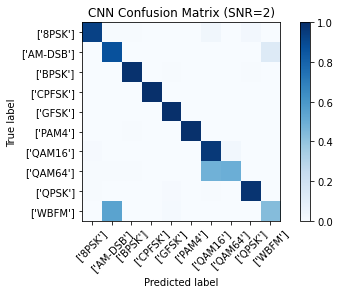

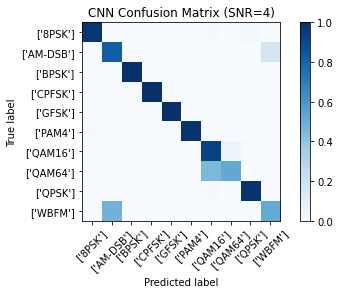

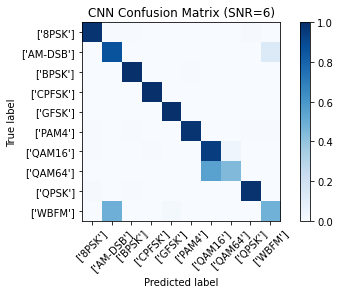

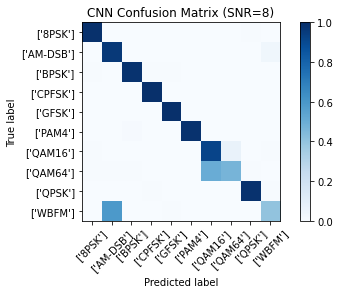

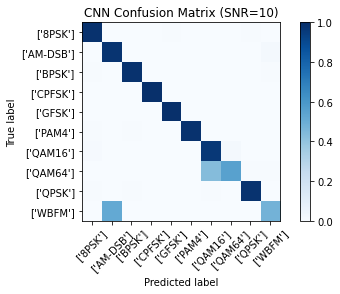

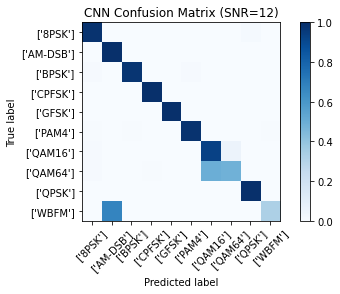

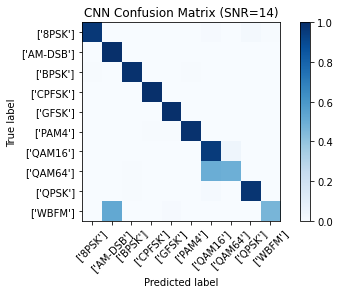

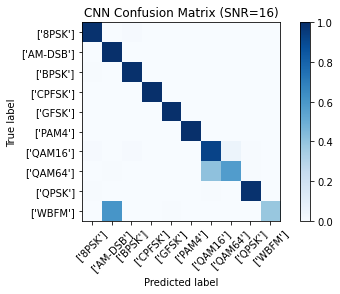

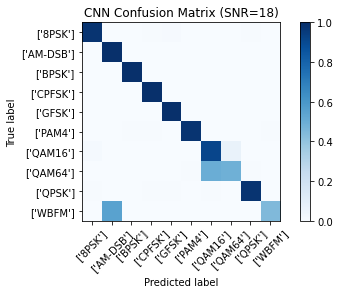

In [ ]:
acc = {}
snr = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

for snr in snrs:
    temp_np = np.array(temp[snr])
    lbl_np = np.array(lb[snr])
    
    #temp_np = temp_np.reshape(temp_np.shape[0], temp_np.shape[1], temp_np.shape[2], 1)
    lbl_np = lbl_np.reshape(lbl_np.shape[0], 1)
    
    temp_i = np.random.choice(temp_np.shape[0], 2000, replace = False)
    test_X_i = temp_np[temp_i]
    test_Y_i = lbl_np[temp_i]   
    
    test_Y_i = enc.transform(test_Y_i).toarray()

    test_X_i = np.transpose(test_X_i[:,:,:],(0,2,1))
    # estimate classes
    test_Y_i_hat = model_cnn.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = (test_Y_i[i,:].tolist()).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="CNN Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

##CGDNN

In [ ]:
layer_in = keras.layers.Input(shape=(128,2)) 
layer = keras.layers.Conv1D(filters=80, kernel_size=(12), activation='relu')(layer_in)
layer = keras.layers.MaxPool1D(pool_size=(2))(layer)
layer = keras.layers.GRU(40, return_sequences=True)(layer)
layer = keras.layers.GaussianDropout(0.4)(layer)
layer = keras.layers.GRU(40, return_sequences=True)(layer)
layer = keras.layers.GaussianDropout(0.4)(layer)
layer = keras.layers.Flatten()(layer)
layer_out = keras.layers.Dense(10, activation='softmax')(layer)

model_CGDNN = keras.models.Model(layer_in, layer_out)

optimizer = keras.optimizers.adam_v2.Adam(learning_rate=0.002)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "cgdnn_model.h5", save_best_only=True, monitor="val_loss"),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.4, patience=4, min_lr=0.000007),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1)]

model_CGDNN.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model_CGDNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 2)]          0         
                                                                 
 conv1d (Conv1D)             (None, 117, 80)           2000      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 58, 80)           0         
 )                                                               
                                                                 
 gru (GRU)                   (None, 58, 40)            14640     
                                                                 
 gaussian_dropout (GaussianD  (None, 58, 40)           0         
 ropout)                                                         
                                                                 
 gru_1 (GRU)                 (None, 58, 40)            9840  

In [ ]:
model_CGDNN.load_weights('/content/drive/MyDrive/HTVT_BTL/RadioML_2016.10b/cgdnn_model.h5')

In [ ]:
tf.keras.backend.clear_session()
history = model_CGDNN.fit(X_train, y_train, batch_size=128, epochs=14, validation_data= (X_val, y_val), callbacks=callbacks)

Epoch 1/14
6774/6774 [==============================] - 474s 70ms/step - loss: 1.5716 - accuracy: 0.4517 - val_loss: 2.1310 - val_accuracy: 0.2170 - lr: 8.0000e-04
Epoch 2/14
6774/6774 [==============================] - 457s 68ms/step - loss: 1.9957 - accuracy: 0.2474 - val_loss: 2.1988 - val_accuracy: 0.1691 - lr: 8.0000e-04
Epoch 3/14
6774/6774 [==============================] - 464s 68ms/step - loss: 1.9059 - accuracy: 0.2670 - val_loss: 1.6181 - val_accuracy: 0.3654 - lr: 8.0000e-04
Epoch 4/14
6774/6774 [==============================] - 464s 68ms/step - loss: 1.4053 - accuracy: 0.4409 - val_loss: 1.9837 - val_accuracy: 0.2512 - lr: 8.0000e-04
Epoch 5/14
6774/6774 [==============================] - 443s 65ms/step - loss: 1.6056 - accuracy: 0.3713 - val_loss: 1.1819 - val_accuracy: 0.5196 - lr: 8.0000e-04
Epoch 6/14
6774/6774 [==============================] - 455s 67ms/step - loss: 1.1805 - accuracy: 0.5192 - val_loss: 1.2791 - val_accuracy: 0.4710 - lr: 8.0000e-04
Epoch 7/14
6774/

In [ ]:
#tf.keras.backend.clear_session()
history = model_CGDNN.fit(X_train, y_train, batch_size=128, epochs=15, validation_data= (X_val, y_val), callbacks=callbacks)

Epoch 1/15
6774/6774 [==============================] - 223s 32ms/step - loss: 1.2989 - accuracy: 0.4652 - val_loss: 1.1567 - val_accuracy: 0.5192 - lr: 0.0020
Epoch 2/15
6774/6774 [==============================] - 219s 32ms/step - loss: 1.0892 - accuracy: 0.5401 - val_loss: 1.0582 - val_accuracy: 0.5504 - lr: 0.0020
Epoch 3/15
6774/6774 [==============================] - 219s 32ms/step - loss: 1.0592 - accuracy: 0.5539 - val_loss: 1.0466 - val_accuracy: 0.5689 - lr: 0.0020
Epoch 4/15
6774/6774 [==============================] - 219s 32ms/step - loss: 1.0196 - accuracy: 0.5844 - val_loss: 0.9774 - val_accuracy: 0.6084 - lr: 0.0020
Epoch 5/15
6774/6774 [==============================] - 215s 32ms/step - loss: 0.9933 - accuracy: 0.5982 - val_loss: 0.9668 - val_accuracy: 0.6113 - lr: 0.0020
Epoch 6/15
6774/6774 [==============================] - 213s 31ms/step - loss: 0.9830 - accuracy: 0.6030 - val_loss: 0.9535 - val_accuracy: 0.6161 - lr: 0.0020
Epoch 7/15
6774/6774 [==================

In [ ]:
model = keras.models.load_model("cgdnn_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy CGDNN", test_acc)
print("Test loss CGDNN", test_loss)

5625/5625 [==============================] - 44s 8ms/step - loss: 0.9207 - accuracy: 0.6305
Test accuracy CGDNN 0.6305222511291504
Test loss CGDNN 0.9206922054290771


In [ ]:
model = keras.models.load_model("cgdnn_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy CGDNN", test_acc)
print("Test loss CGDNN", test_loss)

5625/5625 [==============================] - 62s 11ms/step - loss: 0.9333 - accuracy: 0.6242
Test accuracy CGDNN 0.624155580997467
Test loss CGDNN 0.9332705736160278


In [ ]:
model = keras.models.load_model("cgdnn_model.h5")

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy CGDNN", test_acc)
print("Test loss CGDNN", test_loss)

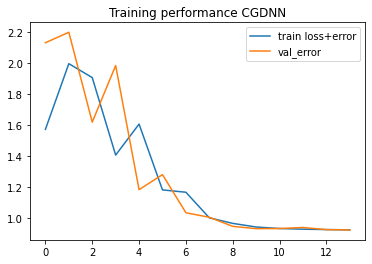

In [ ]:
### Loss graph 

plt.figure()
plt.title('Training performance CGDNN')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

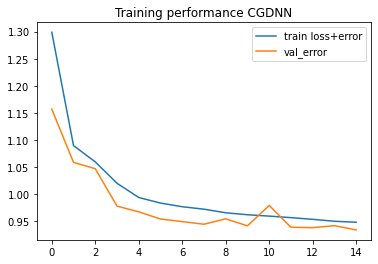

In [ ]:
### Loss graph 

plt.figure()
plt.title('Training performance CGDNN')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

In [ ]:
### Loss graph 

plt.figure()
plt.title('Training performance CGDNN')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()

In [ ]:
### Confusion matrix oluşturulması 
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

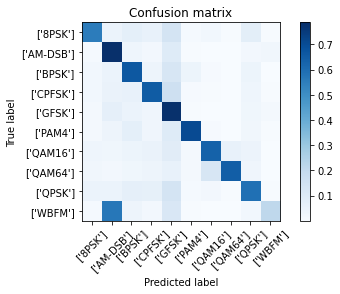

In [ ]:
### Plot confusion matrix
test_Y_hat = model_CGDNN.predict(X_test, batch_size=32)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
#figure(figsize=(10, 8)
plot_confusion_matrix(confnorm, labels=classes)

In [ ]:
temp = {}
lb = {}

for i in range(20):
    temp[-20 + (i *2)] = []
    lb[-20 + (i *2)] = []
    
for i in range(20):
    for j in range(10):
        arr = df[(classes[j][0] , (-20 + (i *2)))]
        for k in range(len(arr)) : temp [-20 + (i *2 )].append(arr[k])
        for k in range(len(df[classes[j][0], -20 + ( i*2)])): lb[-20 + (i*2)].append(classes[j][0])

Overall Accuracy:  0.113
Overall Accuracy:  0.103
Overall Accuracy:  0.116
Overall Accuracy:  0.142
Overall Accuracy:  0.1715
Overall Accuracy:  0.278
Overall Accuracy:  0.3985
Overall Accuracy:  0.533
Overall Accuracy:  0.6715
Overall Accuracy:  0.81
Overall Accuracy:  0.8765
Overall Accuracy:  0.906
Overall Accuracy:  0.923
Overall Accuracy:  0.9185
Overall Accuracy:  0.9295
Overall Accuracy:  0.928
Overall Accuracy:  0.9225
Overall Accuracy:  0.9245
Overall Accuracy:  0.917
Overall Accuracy:  0.9235


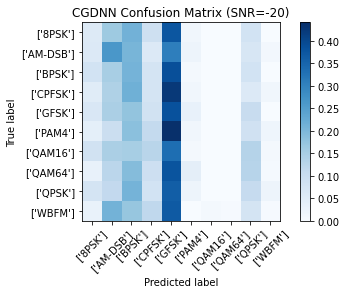

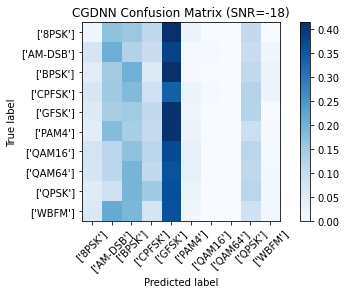

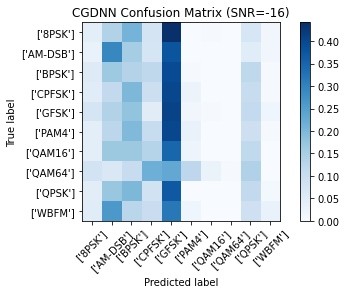

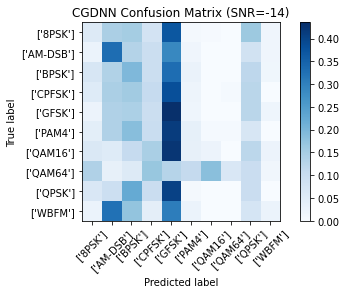

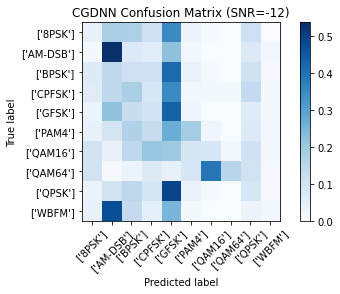

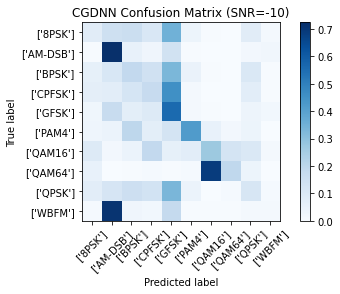

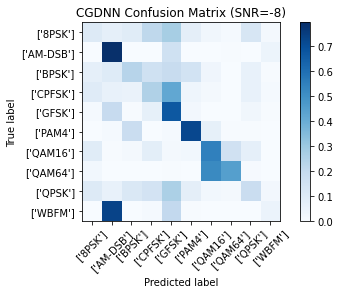

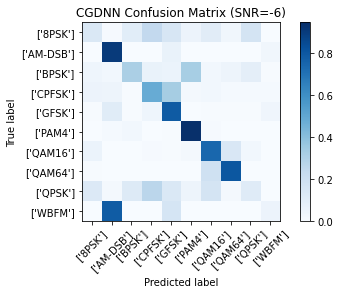

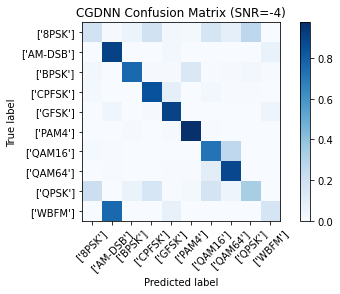

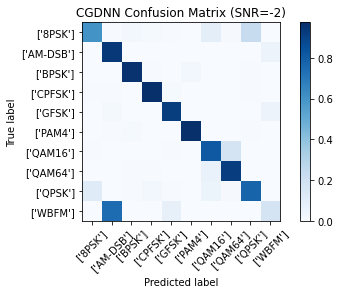

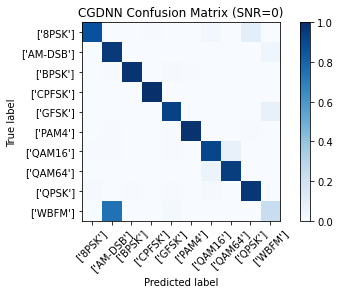

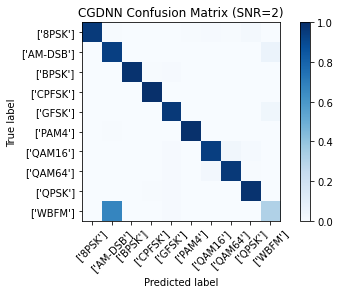

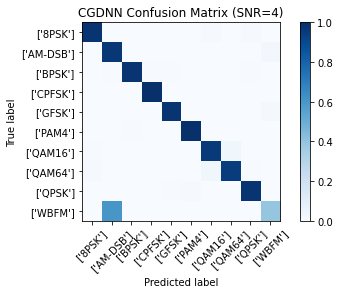

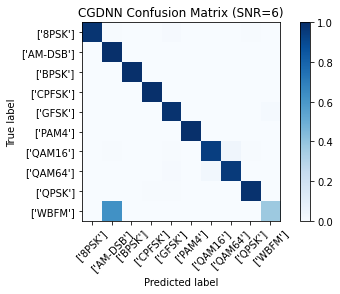

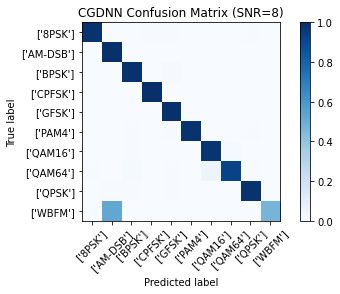

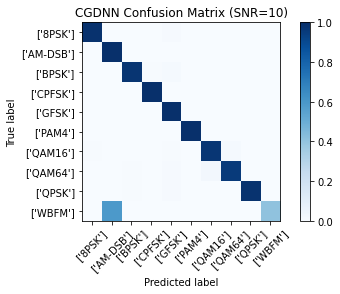

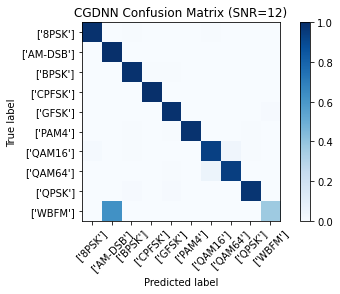

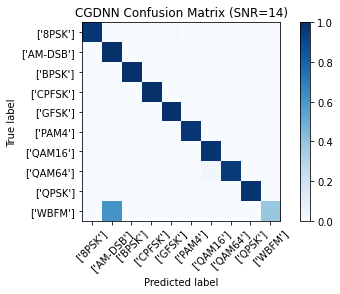

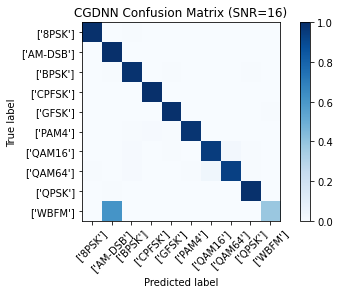

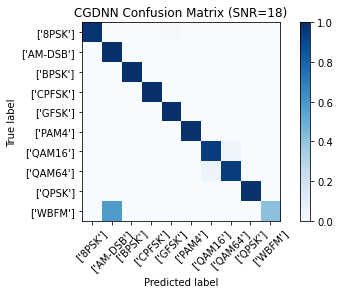

In [ ]:
acc = {}
snr = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

for snr in snrs:
    temp_np = np.array(temp[snr])
    lbl_np = np.array(lb[snr])
    
    #temp_np = temp_np.reshape(temp_np.shape[0], temp_np.shape[1], temp_np.shape[2], 1)
    lbl_np = lbl_np.reshape(lbl_np.shape[0], 1)
    
    temp_i = np.random.choice(temp_np.shape[0], 2000, replace = False)
    test_X_i = temp_np[temp_i]
    test_Y_i = lbl_np[temp_i]   
    
    test_Y_i = enc.transform(test_Y_i).toarray()

    test_X_i = np.transpose(test_X_i[:,:,:],(0,2,1))
    # estimate classes
    test_Y_i_hat = model_CGDNN.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = (test_Y_i[i,:].tolist()).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="CGDNN Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print("Overall Accuracy: ", cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)